# Scatter plots & Correlations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 15 }
plt.rc('font', **font)

In [3]:
df = pd.read_csv('../data/data.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,17,20,21,22,23,25,26,27,34,35,37,38,79,134) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,IDIROID,YEAR,YR_NUM,TOTAL_YEARS,EARLY_TRANSFER,EARLY_CANX_LEFT,EARLY_CANX_DEFER,FEB_CANX_LEFT,FEB_CANX_DEFER,DAYS_TO_FIRST_REG,...,NUM_MAY_TYPE_C,NUM_MAY_TYPE_D,NUM_MAY_TYPE_E,NUM_MAY_TYPE_X,NUM_MAY_TYPE_S,EARLIEST_CRM_DATE,DAYS_TO_FIRST_CRM,PREV_NUM_CRM,Precision`Mark,Overal`Mark
0,239,2014,1,1,N,N,N,N,N,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.40,71.0
1,243,2014,1,1,N,N,N,N,N,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.00,68.0
2,2408,2014,1,1,N,N,N,N,N,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.96,58.0
3,2414,2014,1,1,N,N,N,N,N,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.58,64.0
4,2415,2014,1,1,N,N,N,N,N,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.46,62.0


In [5]:
feature_names = list(df.drop(
    ["RESULT", "Precision`Mark", "Overal`Mark"], 1).columns)

In [6]:
feature_names[:10]

['IDIROID',
 'YEAR',
 'YR_NUM',
 'TOTAL_YEARS',
 'EARLY_TRANSFER',
 'EARLY_CANX_LEFT',
 'EARLY_CANX_DEFER',
 'FEB_CANX_LEFT',
 'FEB_CANX_DEFER',
 'DAYS_TO_FIRST_REG']

In [7]:
subset = df[feature_names[:10]]

In [8]:
subset.head(2)

,IDIROID,YEAR,YR_NUM,TOTAL_YEARS,EARLY_TRANSFER,EARLY_CANX_LEFT,EARLY_CANX_DEFER,FEB_CANX_LEFT,FEB_CANX_DEFER,DAYS_TO_FIRST_REG
0,239,2014,1,1,N,N,N,N,N,16
1,243,2014,1,1,N,N,N,N,N,14


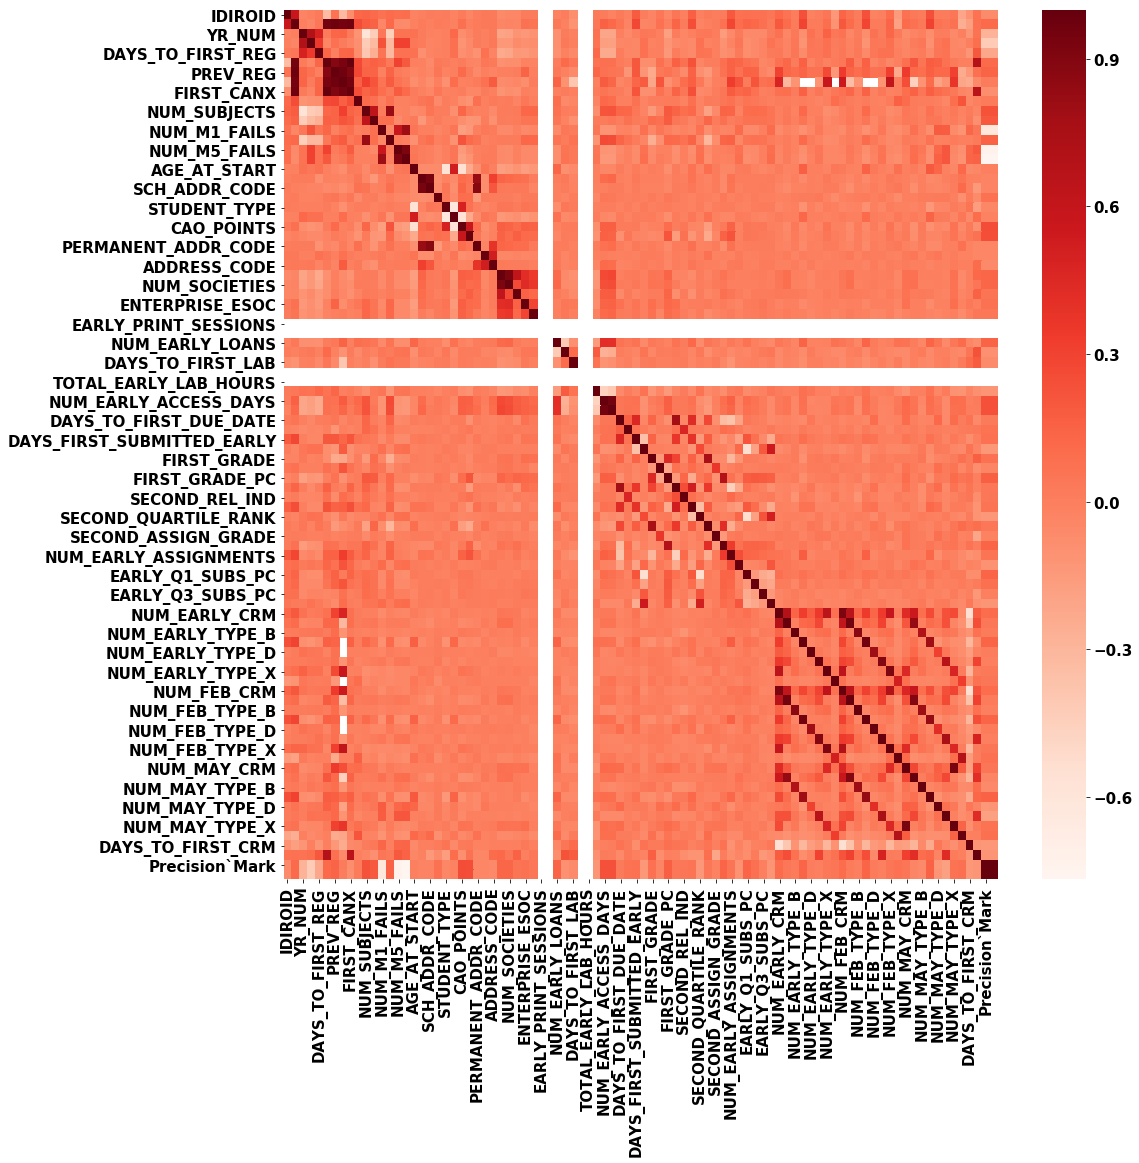

In [9]:
plt.figure(figsize=(16, 16))
cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.savefig('../figures/correlations.png', bbox_inches="tight")

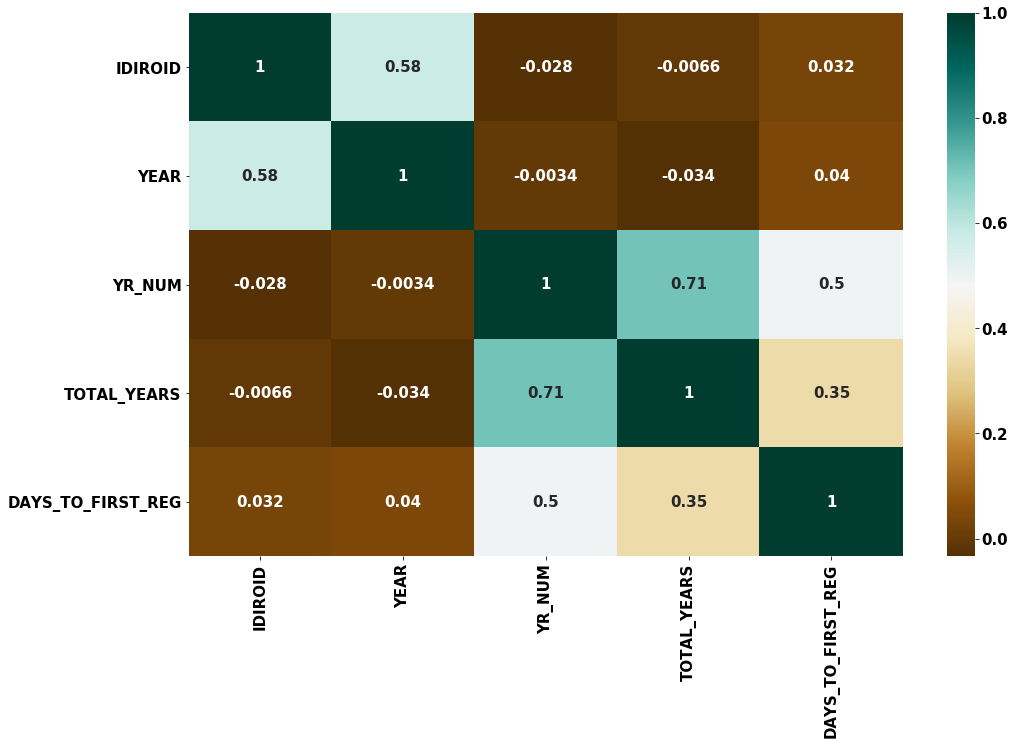

In [10]:
# subset features
plt.figure(figsize=(16, 10))
cor = subset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BrBG)
plt.savefig('../figures/corr_subset.png', bbox_inches="tight")

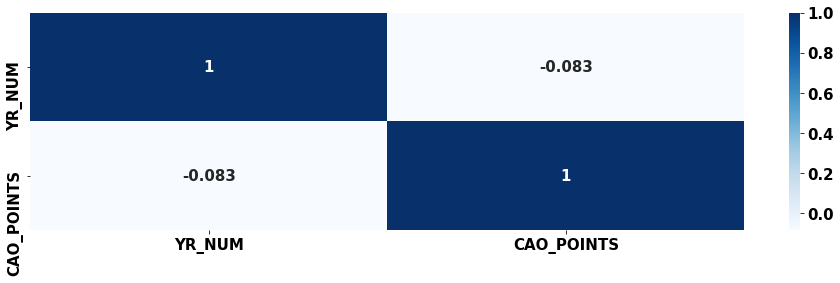

In [11]:
plt.figure(figsize=(16, 4))
cor = df[['YR_NUM', 'CAO_POINTS']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.savefig('../figures/corr_YR_NUM_CAO_POINTS.png', bbox_inches="tight")

In [12]:
df[
    ['CAO_POINTS', 'FIRST_GRADE']
].corr() # method='pearson'

,CAO_POINTS,FIRST_GRADE
CAO_POINTS,1.000000,-0.009034
FIRST_GRADE,-0.009034,1.000000


In [13]:
df[
    ['CAO_POINTS', 'FIRST_GRADE']
].corr(method='spearman')

,CAO_POINTS,FIRST_GRADE
CAO_POINTS,1.000000,0.069045
FIRST_GRADE,0.069045,1.000000


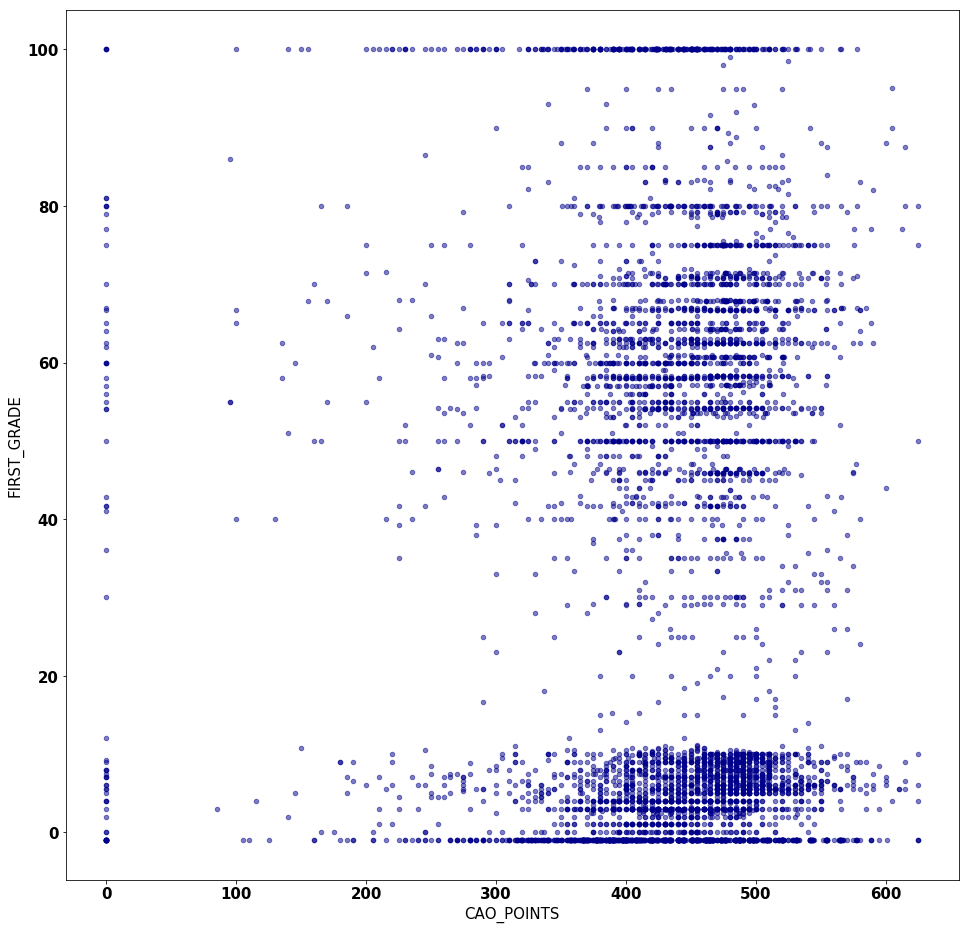

In [14]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='FIRST_GRADE', 
    c='DarkBlue', 
    alpha=0.5,
    figsize=(16, 16)
)

In [15]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_FIRST_GRADE.png', bbox_inches="tight")

In [16]:
df[
    ['CAO_POINTS', 'FIRST_GRADE_PC']
].corr()

,CAO_POINTS,FIRST_GRADE_PC
CAO_POINTS,1.000000,0.099675
FIRST_GRADE_PC,0.099675,1.000000


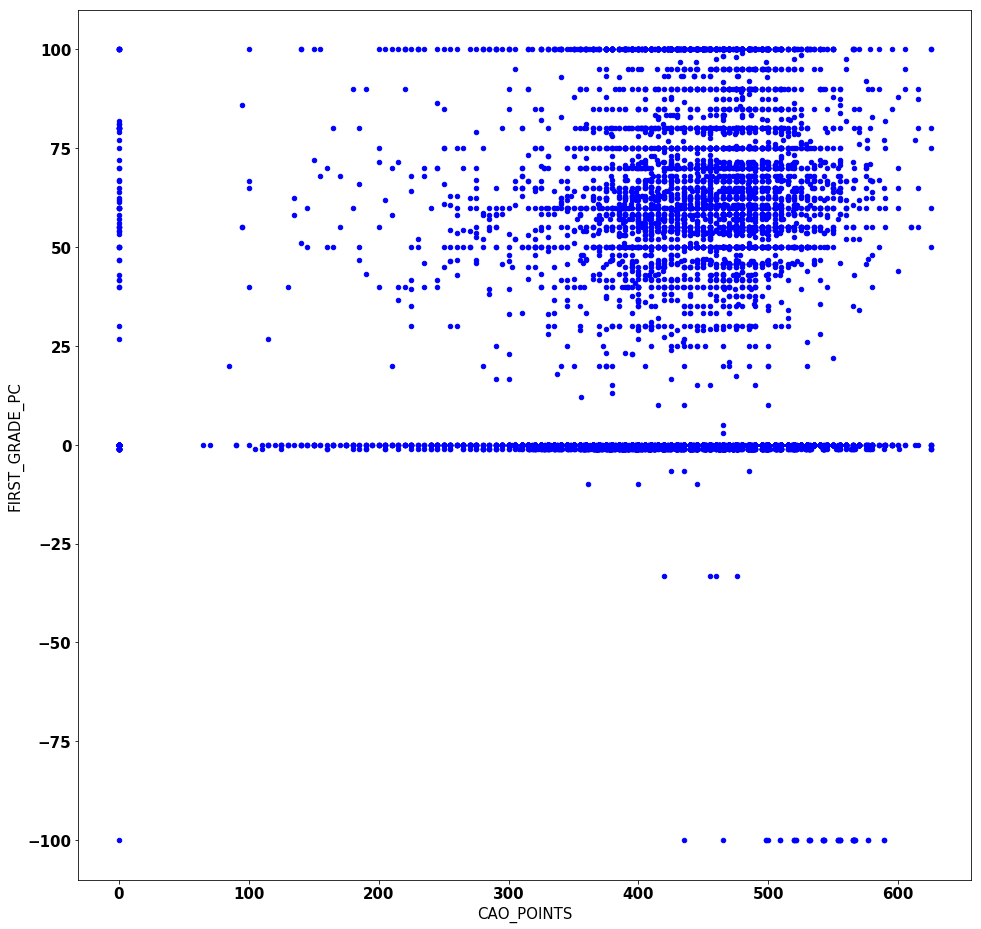

In [17]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='FIRST_GRADE_PC', 
    c='blue', 
    figsize=(16, 16)
)

In [18]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_FIRST_GRADE_PC.png', bbox_inches="tight")

In [19]:
df[
    ['CAO_POINTS', 'SECOND_GRADE']
].corr()

,CAO_POINTS,SECOND_GRADE
CAO_POINTS,1.000000,-0.164677
SECOND_GRADE,-0.164677,1.000000


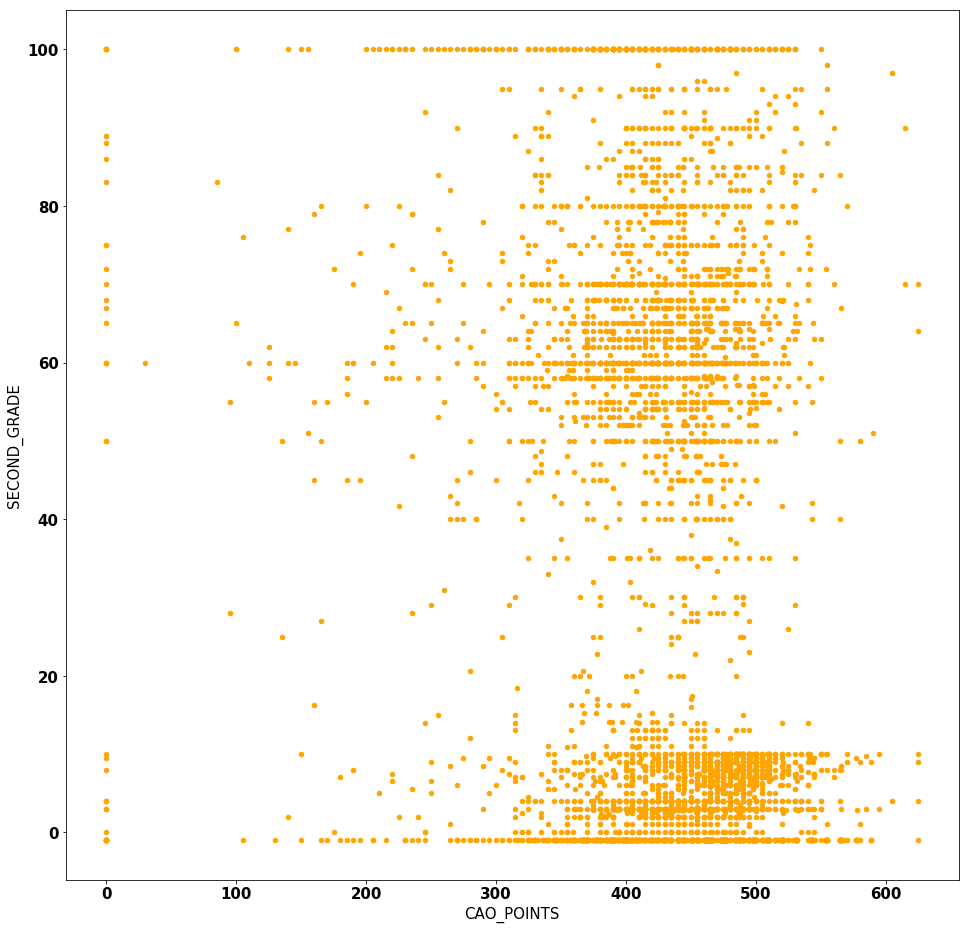

In [20]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='SECOND_GRADE', 
    c='orange', 
    figsize=(16, 16)
)

In [21]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_SECOND_GRADE.png', bbox_inches="tight")

In [22]:
df[
    ['NUM_EARLY_ACCESS_DAYS', 'NUM_EARLY_ASSIGNMENTS']
].corr()

,NUM_EARLY_ACCESS_DAYS,NUM_EARLY_ASSIGNMENTS
NUM_EARLY_ACCESS_DAYS,1.000000,0.159236
NUM_EARLY_ASSIGNMENTS,0.159236,1.000000


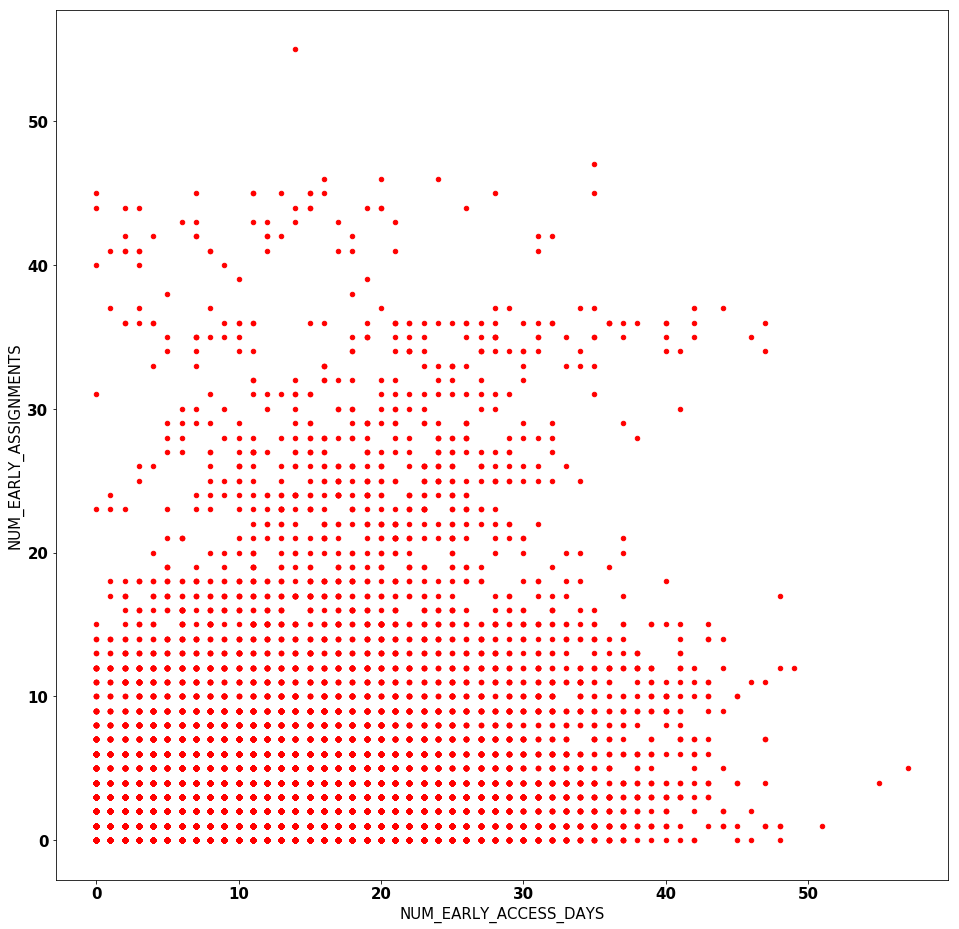

In [23]:
fig = df.plot.scatter(
    x='NUM_EARLY_ACCESS_DAYS', 
    y='NUM_EARLY_ASSIGNMENTS', 
    c='red', 
    figsize=(16, 16)
)

In [24]:
fig.get_figure().savefig('../figures/scatter_NUM_EARLY_ACCESS_DAYS_NUM_EARLY_ASSIGNMENTS.png', bbox_inches="tight")

In [25]:
df[
    ['NUM_EARLY_LOANS', 'NUM_EARLY_ACCESS_DAYS']
].corr()

,NUM_EARLY_LOANS,NUM_EARLY_ACCESS_DAYS
NUM_EARLY_LOANS,1.000000,0.413543
NUM_EARLY_ACCESS_DAYS,0.413543,1.000000


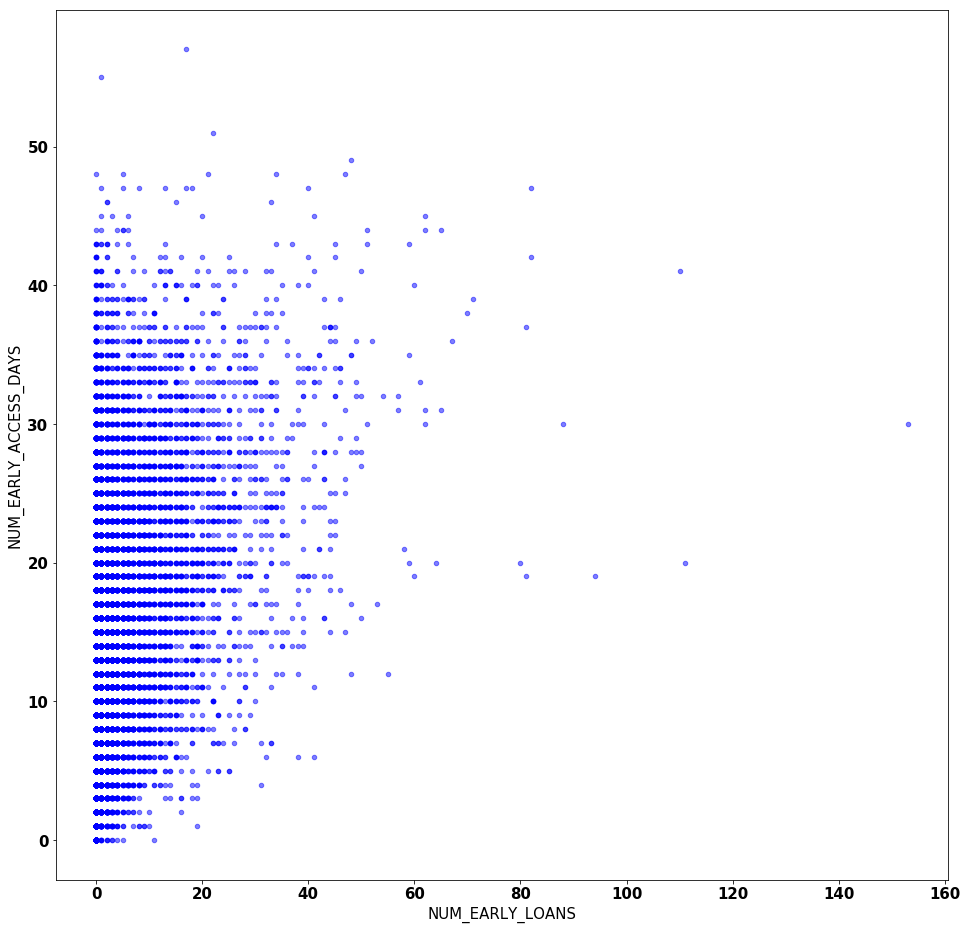

In [26]:
fig = df.plot.scatter(
    x='NUM_EARLY_LOANS', 
    y='NUM_EARLY_ACCESS_DAYS', 
    c='blue', 
    alpha=0.5,
    figsize=(16, 16)
)

In [27]:
fig.get_figure().savefig('../figures/scatter_NUM_EARLY_LOANS_NUM_EARLY_ACCESS_DAYS.png', bbox_inches="tight")

In [28]:
df[
    ['DAYS_TO_FIRST_LAB', 'DAYS_TO_FIRST_ACCESS']
].corr()

,DAYS_TO_FIRST_LAB,DAYS_TO_FIRST_ACCESS
DAYS_TO_FIRST_LAB,1.000000,0.065373
DAYS_TO_FIRST_ACCESS,0.065373,1.000000


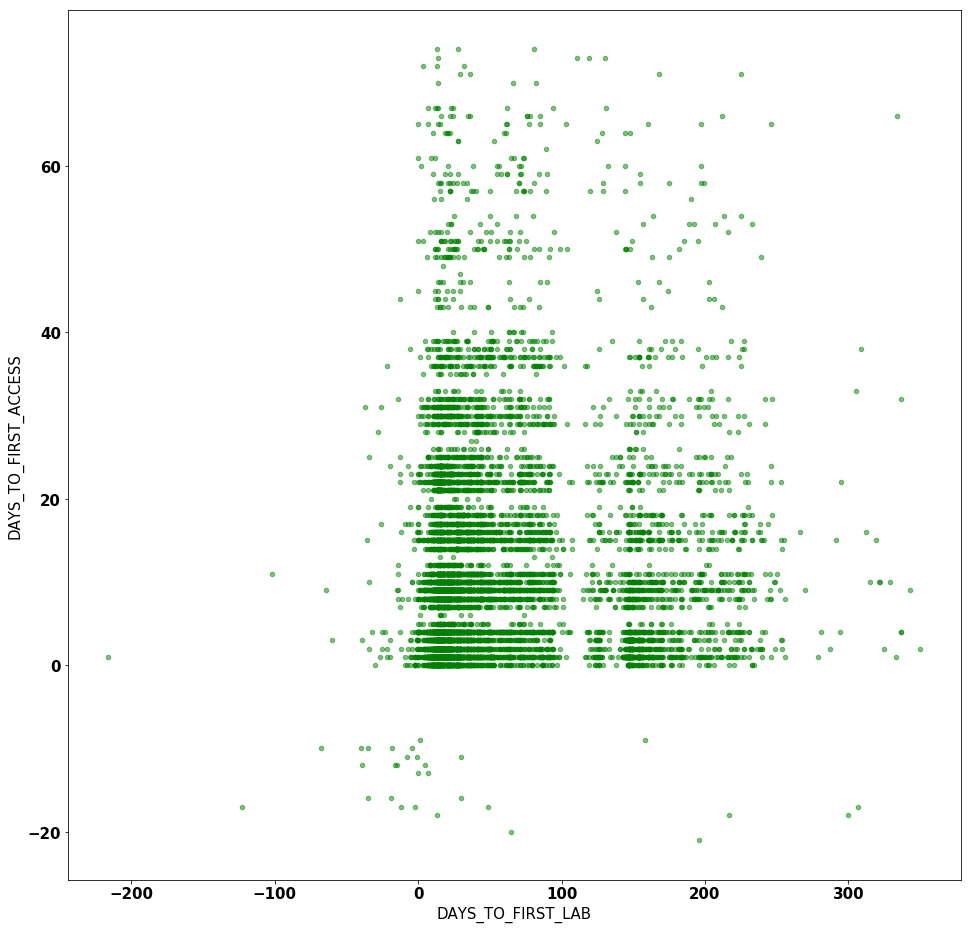

In [29]:
fig = df.plot.scatter(
    x='DAYS_TO_FIRST_LAB', 
    y='DAYS_TO_FIRST_ACCESS', 
    c='green', 
    alpha=0.5,
    figsize=(16, 16)
)

In [30]:
fig.get_figure().savefig('../figures/scatter_DAYS_TO_FIRST_LAB_DAYS_TO_FIRST_ACCESS.png', bbox_inches="tight")

In [31]:
df[
    ['NUM_EARLY_CRM', 'NUM_EARLY_LATES']
].corr()

,NUM_EARLY_CRM,NUM_EARLY_LATES
NUM_EARLY_CRM,1.000000,0.045151
NUM_EARLY_LATES,0.045151,1.000000


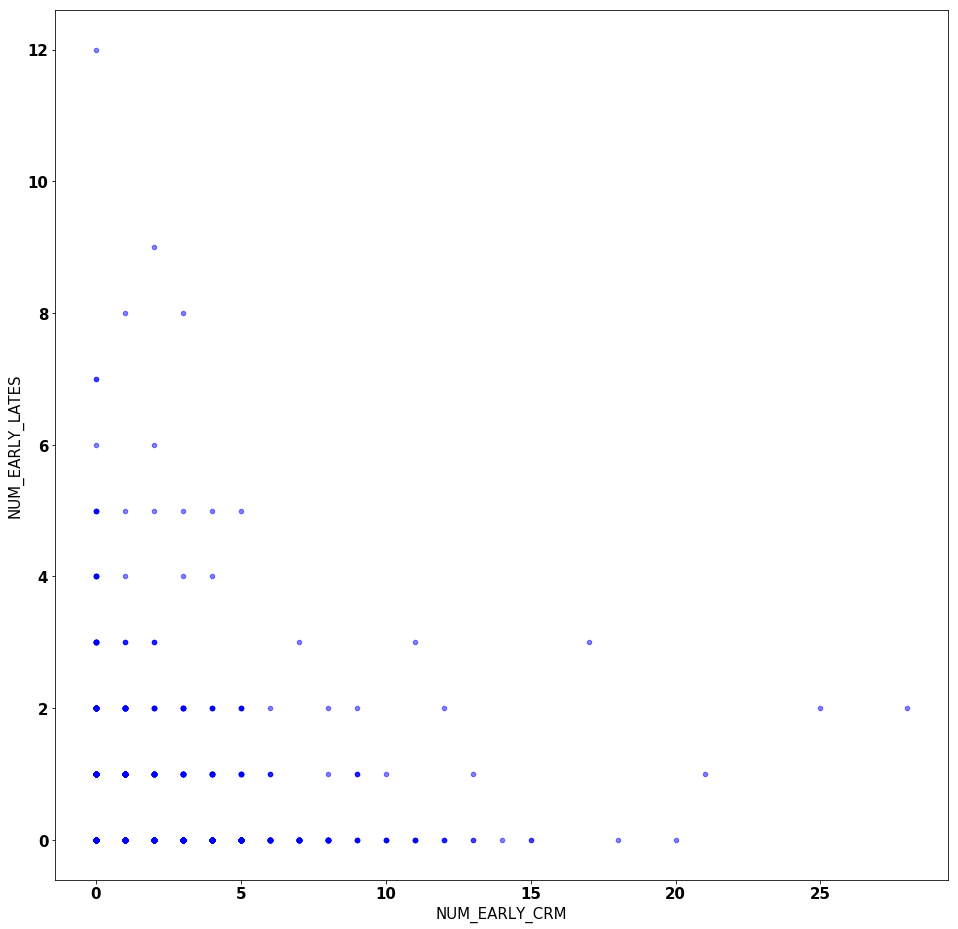

In [32]:
fig = df.plot.scatter(
    x='NUM_EARLY_CRM', 
    y='NUM_EARLY_LATES', 
    c='blue', 
    alpha=0.5,
    figsize=(16, 16)
)

In [33]:
fig.get_figure().savefig('../figures/scatter_NUM_EARLY_CRM_NUM_EARLY_LATES.png', bbox_inches="tight")

In [34]:
df[
    ['FIRST_GRADE', 'SECOND_GRADE']
].corr()

,FIRST_GRADE,SECOND_GRADE
FIRST_GRADE,1.000000,0.757133
SECOND_GRADE,0.757133,1.000000


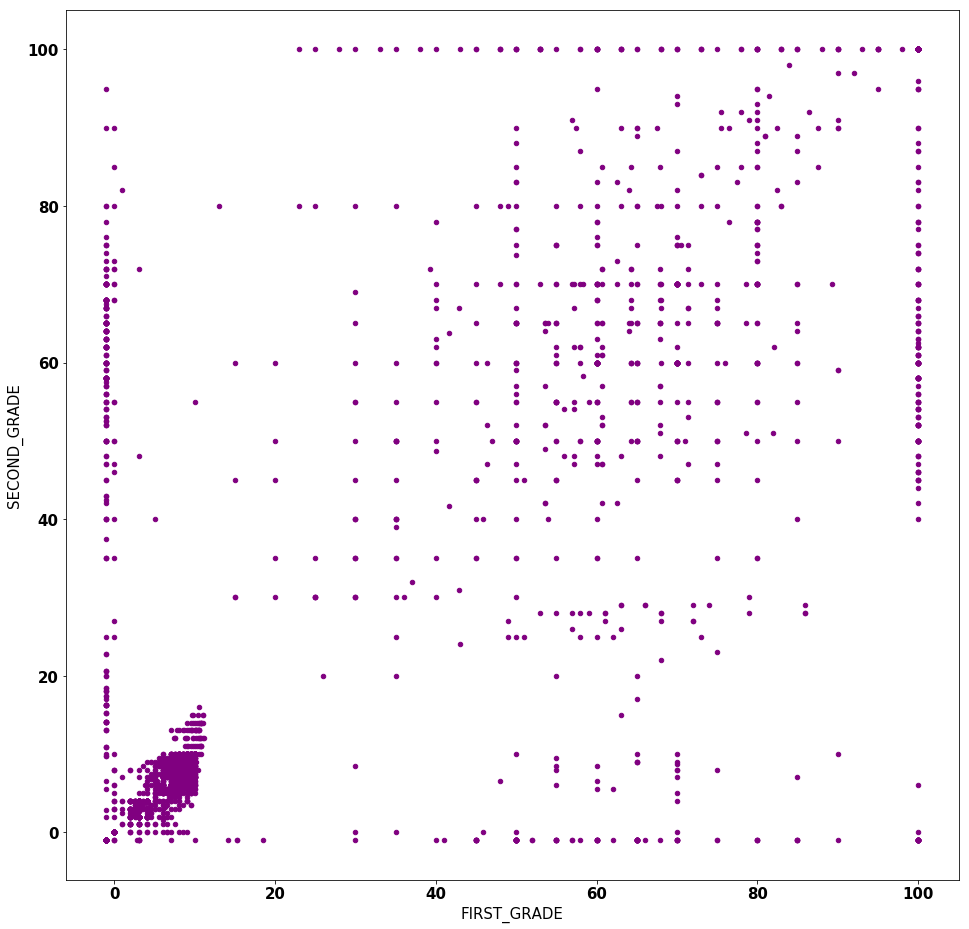

In [35]:
fig = df.plot.scatter(
    x='FIRST_GRADE', 
    y='SECOND_GRADE', 
    c='purple', 
    figsize=(16, 16)
)

In [36]:
fig.get_figure().savefig('../figures/scatter_FIRST_GRADE_SECOND_GRADE.png', bbox_inches="tight")

In [37]:
df[
    ['CAO_POINTS', 'LC_MATHS_POINTS']
].corr()

,CAO_POINTS,LC_MATHS_POINTS
CAO_POINTS,1.000000,0.579138
LC_MATHS_POINTS,0.579138,1.000000


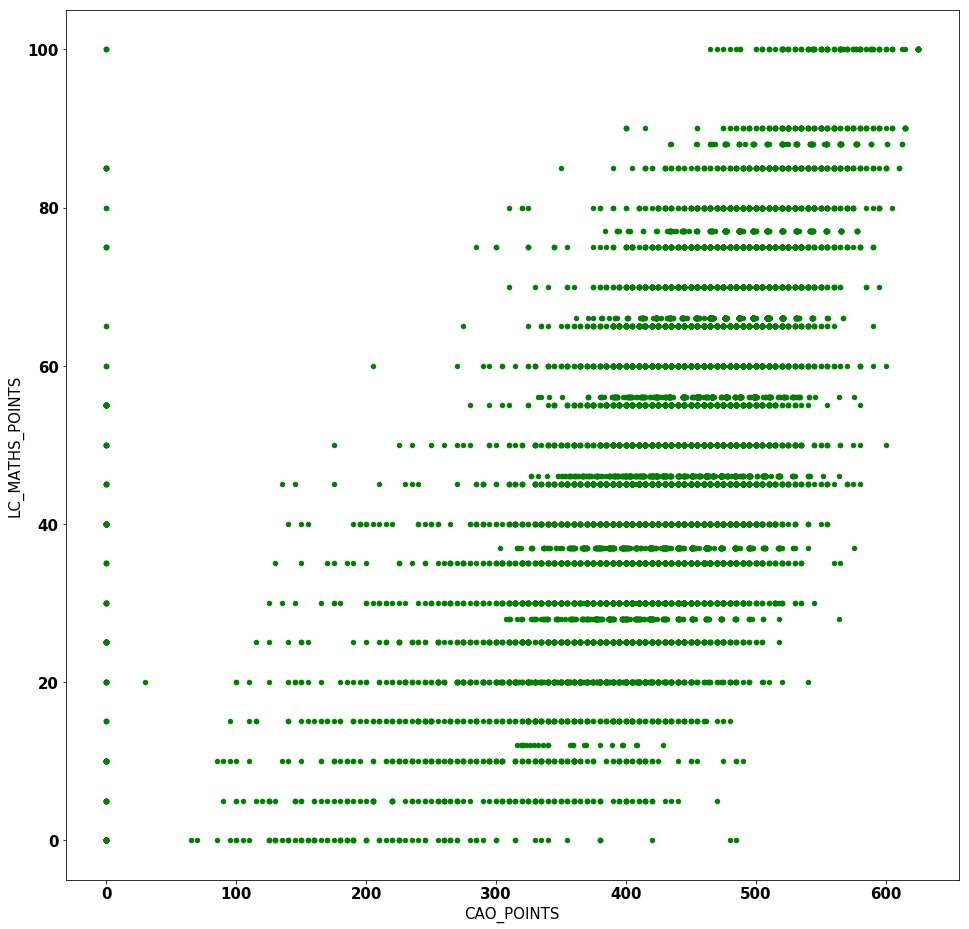

In [38]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='LC_MATHS_POINTS', 
    c='green', 
    figsize=(16, 16)
)

In [39]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_LC_MATHS_POINTS.png', bbox_inches="tight")

In [40]:
df[
    ['CAO_POINTS', 'Precision`Mark']
].corr()

,CAO_POINTS,Precision`Mark
CAO_POINTS,1.000000,0.255882
Precision`Mark,0.255882,1.000000


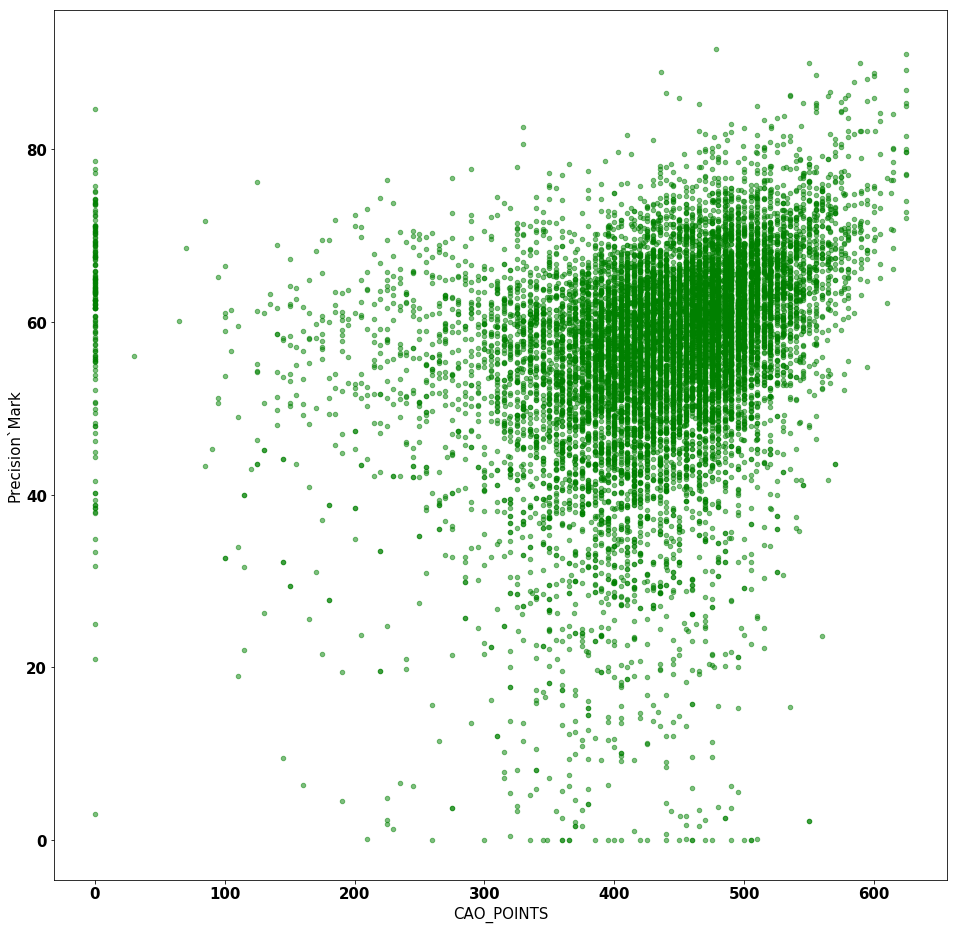

In [41]:
fig = df.plot.scatter(
    x='CAO_POINTS', 
    y='Precision`Mark', 
    c='green',
    alpha=0.5,
    figsize=(16, 16)
)

In [42]:
fig.get_figure().savefig('../figures/scatter_CAO_POINTS_PRECISION_MARK.png', bbox_inches="tight")

In [43]:
df[
    ['LC_MATHS_POINTS', 'Precision`Mark']
].corr()

,LC_MATHS_POINTS,Precision`Mark
LC_MATHS_POINTS,1.000000,0.250412
Precision`Mark,0.250412,1.000000


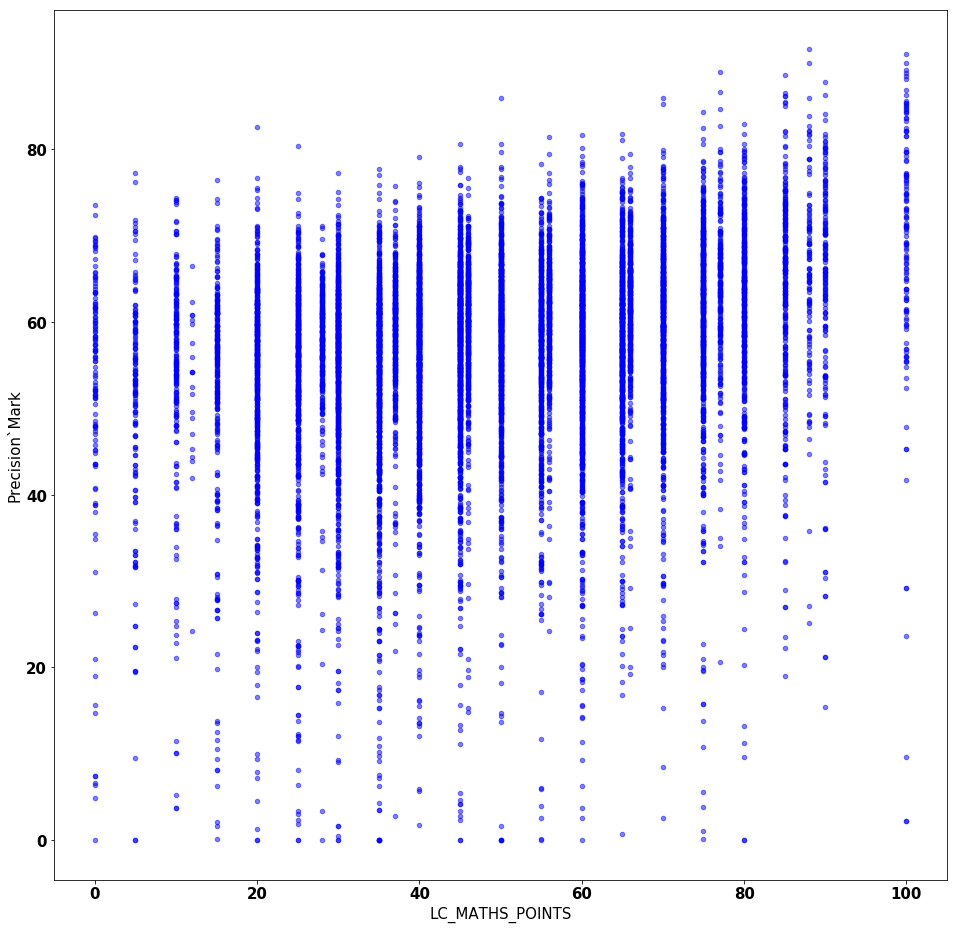

In [44]:
fig = df.plot.scatter(
    x='LC_MATHS_POINTS', 
    y='Precision`Mark', 
    c='b',
    alpha=0.5,
    figsize=(16, 16)
)

In [45]:
fig.get_figure().savefig('../figures/scatter_LC_MATHS_POINTS_PRECISION_MARK.png', bbox_inches="tight")

In [46]:
df[
    ['FIRST_GRADE', 'Precision`Mark']
].corr()

,FIRST_GRADE,Precision`Mark
FIRST_GRADE,1.000000,0.075062
Precision`Mark,0.075062,1.000000


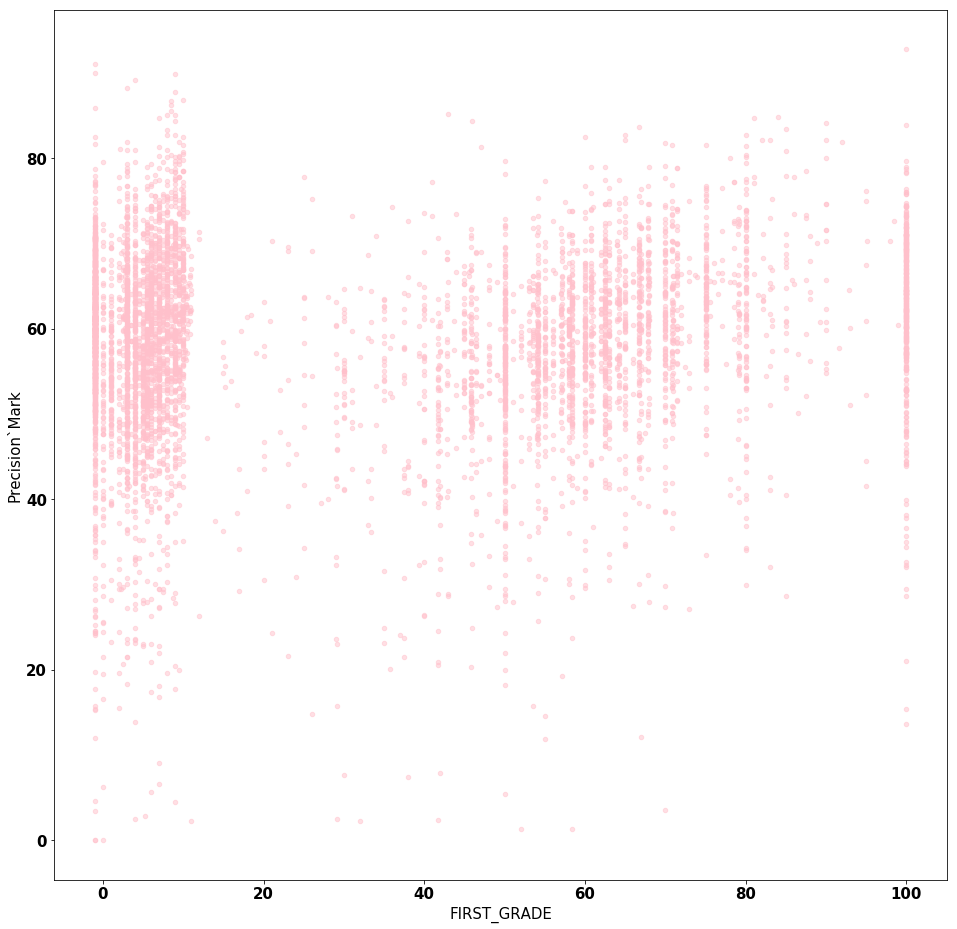

In [47]:
fig = df.plot.scatter(
    x='FIRST_GRADE', 
    y='Precision`Mark', 
    c='pink',
    alpha=0.5,
    figsize=(16, 16)
)

In [48]:
fig.get_figure().savefig('../figures/scatter_FIRST_GRADE_PRECISION_MARK.png', bbox_inches="tight")